# Importing Modules

In [ ]:
import torch
import torch.nn as nn
import torch.nn.modules 
import torch.nn.functional as F
import torchvision

import torch.optim as optim
import torchvision.transforms as transforms

# Using GPU for model training

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


# ETL Pipeline

## Downloading dataset and transforming it to tensor

In [ ]:
#Downloading MNSIT dataset 
train_set = torchvision.datasets.MNIST(
    root='/content/training_data',
    train=True,
    download= True,
    transform = transforms.Compose([
                                   transforms.ToTensor(),torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
    ])
)

test_set = torchvision.datasets.MNIST(
    root='/content/testing_data',
    train=False,
    download= True,
    transform = transforms.Compose([
                                   transforms.ToTensor(),torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
    ])
)   

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/testing_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/testing_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/testing_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/testing_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/testing_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/testing_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/testing_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/testing_data/MNIST/raw



# Loading Dataset

In [ ]:
#Data loading using data loader class in pytorch
train_loader = torch.utils.data.DataLoader(train_set,batch_size =1000,shuffle = True)

test_loader = torch.utils.data.DataLoader(test_set,batch_size =1000,shuffle = True)

In [ ]:
print(f'number of total steps: {len(train_loader)}')
print(f'number of total steps :{len(test_loader)}')

number of total steps: 60
number of total steps :10


In [ ]:
data = train_set.train_data
labels = train_set.train_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
data.shape,labels.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

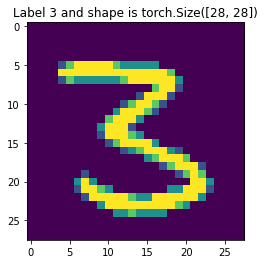

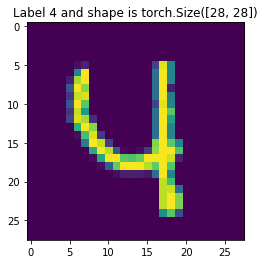

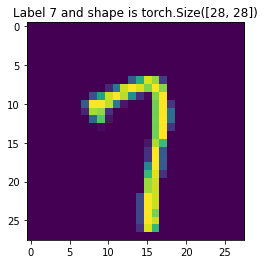

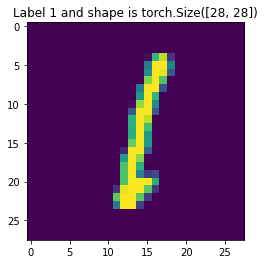

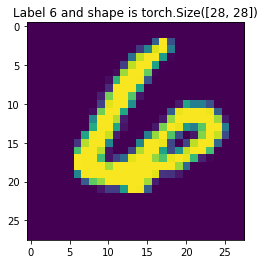

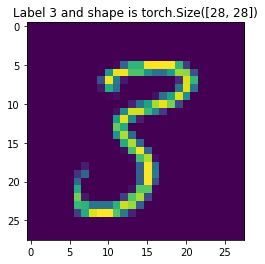

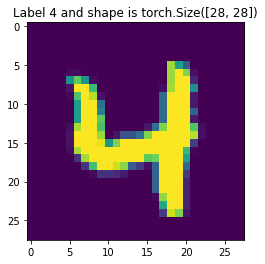

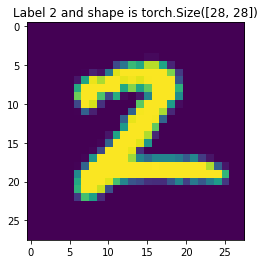

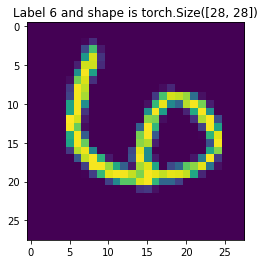

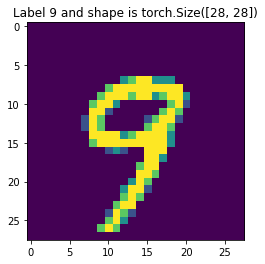

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(10):
  plt.figure() 
  n = np.random.randint(1,6000)
  plt.imshow(data[n])
  plt.title(f'Label {labels[n]} and shape is {data[n].shape}')

# Creating Model

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 192)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

    # def forward(self, t):
    #     t = self.layer(t)
    #     # implement the forward pass
    #     return t

In [ ]:
# Checking Model Parameter
print(f'network conv1 Layer:  {network.conv1}')
print('========================================================')
print(f'Conv1 Layer Weights :{network.conv1.weight}')

network conv1 Layer:  Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
Conv1 Layer Weights :Parameter containing:
tensor([[[[-1.2047e-01, -1.3733e-01, -2.7252e-01, -1.8117e-01, -5.4069e-02],
          [-3.0478e-01, -1.9858e-01, -9.4660e-02, -4.5916e-02, -6.5134e-02],
          [-3.5489e-02,  1.4178e-02, -1.3207e-01,  8.6060e-02,  7.1059e-03],
          [-2.2286e-01, -9.0613e-02,  2.5761e-01,  3.3381e-01,  1.6068e-01],
          [ 1.8325e-01, -6.4964e-02,  1.2940e-01,  6.1522e-02,  1.0151e-01]]],


        [[[-7.6631e-02,  1.1598e-01,  2.3020e-01,  1.0285e-01,  2.3211e-02],
          [ 1.1277e-01,  9.1977e-02, -3.8172e-02, -1.6131e-01, -1.7943e-01],
          [ 2.7603e-02,  1.1411e-01, -4.4536e-02,  1.2679e-01, -2.9380e-02],
          [ 1.4027e-01, -1.0579e-01, -1.9149e-01, -2.1671e-01,  8.1189e-03],
          [-2.4875e-02, -1.5007e-01, -2.1955e-01, -1.9993e-01, -3.2476e-03]]],


        [[[-3.7842e-01, -2.7951e-01, -3.2533e-05,  2.0341e-01, -8.0284e-02],
          [-3.5798e-01, -2.6963e

In [ ]:
network = Network() #Getting model class
print(network)


Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [ ]:
optimizer = optim.SGD(network.parameters(),lr= 0.01 ,momentum =0.5) #Optimizer
print('Optimizer:\n',optimizer)


Optimizer:
 SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.5
    nesterov: False
    weight_decay: 0
)


In [ ]:
loss = nn.CrossEntropyLoss() # Defining Loss Function
print(loss)

CrossEntropyLoss()


In [ ]:
n_total_steps = len(train_loader)
n_epochs =10

In [ ]:
log_interval = 10
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

# Creating training function

def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      #torch.save(network.state_dict(), '/results/model.pth')
      #torch.save(optimizer.state_dict(), '/results/optimizer.pth')


#Creating testing Function

def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

# Training Model

In [ ]:
# Training model
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 4.0667, Accuracy: 39/10000 (0%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 4.082464
Train Epoch: 1 [10000/60000 (17%)]	Loss: 3.966327
Train Epoch: 1 [20000/60000 (33%)]	Loss: 3.610861
Train Epoch: 1 [30000/60000 (50%)]	Loss: 3.073924
Train Epoch: 1 [40000/60000 (67%)]	Loss: 2.776023
Train Epoch: 1 [50000/60000 (83%)]	Loss: 2.545301

Test set: Avg. loss: 2.0567, Accuracy: 5991/10000 (60%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.366738
Train Epoch: 2 [10000/60000 (17%)]	Loss: 2.201572
Train Epoch: 2 [20000/60000 (33%)]	Loss: 2.047476
Train Epoch: 2 [30000/60000 (50%)]	Loss: 1.889680
Train Epoch: 2 [40000/60000 (67%)]	Loss: 1.676818
Train Epoch: 2 [50000/60000 (83%)]	Loss: 1.599095

Test set: Avg. loss: 1.0257, Accuracy: 7665/10000 (77%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.452897
Train Epoch: 3 [10000/60000 (17%)]	Loss: 1.375973
Train Epoch: 3 [20000/60000 (33%)]	Loss: 1.302505
Train Epoch: 3 [30000/60000 (50%)]	Loss: 1.236249
Train Epoch: 3 [40000/60000 (67%)]	Loss: 1.1

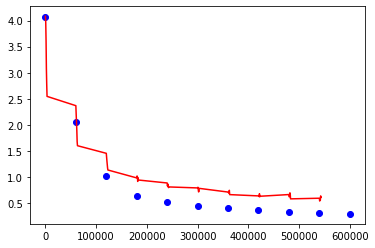

In [ ]:
plt.plot(train_counter,train_losses,color='red')
plt.scatter(test_counter,test_losses,color='blue')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


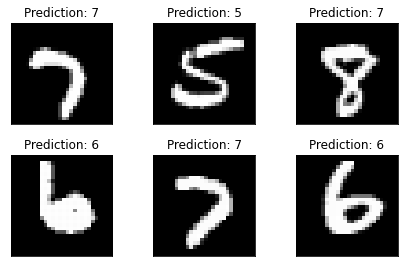

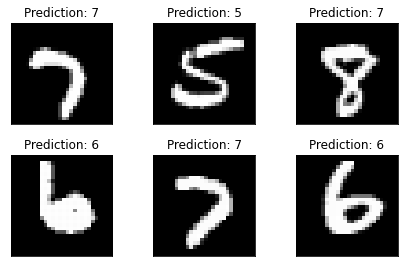

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
with torch.no_grad():
  output = network(example_data)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
len(train_counter),len(test_counter)

(60, 11)